In [1]:
import pandas as pd
import numpy as np

orders = pd.read_csv("datasets/orders/orders.csv")
departments = pd.read_csv("datasets/departments/departments.csv")
aisles = pd.read_csv("datasets/aisles/aisles.csv")
order_products_train = pd.read_csv("datasets/order_products__train/order_products__train.csv")
order_products_prior = pd.read_csv("datasets/order_products__prior/order_products__prior.csv")
products = pd.read_csv("datasets/products/products.csv")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [3]:
def extract_cust_data(orders,products,aisles,departments, order_products_prior, user_id):
    
    # Extracting orders of a particular user_id
    user_data = orders[orders.user_id==user_id]
    
    cust_orders = pd.DataFrame();
    
    # Getting all information from order_products_prior dataframe wrt user_id
    for order in (user_data[user_data.eval_set=='prior'].order_id):
        cust_orders = cust_orders.append(order_products_prior[order_products_prior.order_id==order])
    
    
    # Assuming '0': 'saturday', '1' : 'sunday', '2': 'monday', '3':'tuesday',  '4':'wednesday', '5':'thursday', '6':'friday'
    # and creating a dataframe for reference
    dow = pd.DataFrame({'num_dow' : pd.Series([0,1,2,3,4,5,6], index=[0,1,2,3,4,5,6]),
     'day' : pd.Series(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], index=[0,1,2,3,4,5,6])})
    
    # Merging all important data from all dataframes
    cust_data = cust_orders.merge(user_data[user_data.eval_set=='prior'], left_on='order_id', right_on='order_id', how='outer')
    cust_data = cust_data.merge(products , left_on = 'product_id', right_on = 'product_id' , how= 'left')
    cust_data = cust_data.merge(aisles , left_on = 'aisle_id', right_on = 'aisle_id' , how= 'left')
    cust_data = cust_data.merge(departments , left_on = 'department_id', right_on = 'department_id' , how= 'left')
    cust_data = cust_data.merge(dow , left_on = 'order_dow', right_on = 'num_dow' , how= 'left')
    cust_data = cust_data[['user_id','order_id','order_number','product_id','aisle_id','department_id','eval_set','add_to_cart_order','reordered','order_dow','order_hour_of_day','days_since_prior_order','product_name','aisle','department','day']]
    
    return cust_data

In [229]:

# for Output from train dataset
def extract_num_prod_train_test(orders,products,aisles,departments, order_products_prior, user_id):
    
    # Extracting orders of a particular user_id
    user_data = orders[orders.user_id==user_id]
    
    cust_orders = pd.DataFrame();
    
    # Getting all information from order_products_prior dataframe wrt user_id
    for order in (user_data[user_data.eval_set=='train'].order_id):
        cust_orders = cust_orders.append(order_products_train[order_products_train.order_id==order])
    
    
    # Assuming '0': 'saturday', '1' : 'sunday', '2': 'monday', '3':'tuesday',  '4':'wednesday', '5':'thursday', '6':'friday'
    # and creating a dataframe for reference
    dow = pd.DataFrame({'num_dow' : pd.Series([0,1,2,3,4,5,6], index=[0,1,2,3,4,5,6]),
     'day' : pd.Series(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], index=[0,1,2,3,4,5,6])})
    
    # Merging all important data from all dataframes
    cust_data = cust_orders.merge(user_data[user_data.eval_set=='train'], left_on='order_id', right_on='order_id', how='outer')
    cust_data = cust_data.merge(products , left_on = 'product_id', right_on = 'product_id' , how= 'left')
    cust_data = cust_data.merge(aisles , left_on = 'aisle_id', right_on = 'aisle_id' , how= 'left')
    cust_data = cust_data.merge(departments , left_on = 'department_id', right_on = 'department_id' , how= 'left')
    cust_data = cust_data.merge(dow , left_on = 'order_dow', right_on = 'num_dow' , how= 'left')
    cust_data = cust_data[['user_id','order_id','order_number','product_id','aisle_id','department_id','eval_set','add_to_cart_order','reordered','order_dow','order_hour_of_day','days_since_prior_order','product_name','aisle','department','day']]
    
    return cust_data

In [18]:
cust1=extract_cust_data(orders,products,aisles,departments, order_products_prior, 1)
display(cust1[0:5])
print(len(orders))

,user_id,order_id,order_number,product_id,aisle_id,department_id,eval_set,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,day
0,1,2539329,1,196,77,7,prior,1,0,2,8,NaN,Soda,soft drinks,beverages,Monday
1,1,2539329,1,14084,91,16,prior,2,0,2,8,NaN,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,Monday
2,1,2539329,1,12427,23,19,prior,3,0,2,8,NaN,Original Beef Jerky,popcorn jerky,snacks,Monday
3,1,2539329,1,26088,23,19,prior,4,0,2,8,NaN,Aged White Cheddar Popcorn,popcorn jerky,snacks,Monday
4,1,2539329,1,26405,54,17,prior,5,0,2,8,NaN,XL Pick-A-Size Paper Towel Rolls,paper goods,household,Monday


3421083


In [92]:
# data preparation

#display(cust1['product_id'].value_counts().values[2])
#max_bought = cust1['product_id'].value_counts()
#first_max_bought = cust1['product_id'].value_counts().index[0] if max_bought.values[0] != 1 else None 

def most_bought_item(cust):
    max_bought = cust['product_id'].value_counts()

    first_max_bought = cust['product_id'].value_counts().index[0] if max_bought.values[0] != 1 else None
    second_max_bought = cust['product_id'].value_counts().index[1] if max_bought.values[1] != 1 else None
    third_max_bought = cust['product_id'].value_counts().index[2] if max_bought.values[2] != 1 else None

    return first_max_bought,second_max_bought,third_max_bought


def highest_priority_item(cust):
    full_data = cust[['product_id','add_to_cart_order']]

    agg_ranks=[]
    
    first_priority = second_priority = third_priority = None
    
    prod_frq = full_data['product_id'].value_counts()
    for uniq in full_data['product_id'].unique():
        if prod_frq[prod_frq.index==uniq].values > 1:
            ranks_of_uniq = full_data[full_data.product_id == uniq ]
            agg_ranks.append([uniq,np.mean(ranks_of_uniq['add_to_cart_order'])])
        else:
            agg_ranks.append([uniq,None])

    c=pd.DataFrame(agg_ranks,columns= ['prod','ranks'])
    c['ranked'] = c['ranks'].rank(ascending=1,na_option = 'bottom')
    c=c[~np.isnan(c['ranks'])]
    
    if np.shape(c)[0]>=3:
        first_priority, second_priority, third_priority = c.sort('ranked')[0:3]['prod'].values
    else:
        try: # Only to consider true priority products and not products that have been purchased just once
            first_priority = c.sort('ranked')['prod'].values[0]
        except IndexError: #try- except helps in cases where the sorted c array is not of full size 3 
            first_priority = None
        try:
            second_priority = c.sort('ranked')['prod'].values[1]
        except IndexError:
            second_priority = None 
        try:
            third_priority = c.sort('ranked')['prod'].values[2]
        except IndexError:
            third_priority = None
            
    return first_priority, second_priority, third_priority
    
def average_prev_days(cust):
    prior_days=[]
    for ord_num in cust.order_number.unique():
        prior_days.append(cust[cust.order_number==ord_num].days_since_prior_order.values[0])

    prior_days = [x for x in prior_days if not np.isnan(x)]
    average_prior_days = np.mean(prior_days)
    
    return average_prior_days

def aisle_preferred(cust):
    cust_preferred_aisle = cust.aisle_id.value_counts()[0:3]
    inc = 1

    first_aisle_preferred = second_aisle_preferred = third_aisle_preferred = None

    for aisle, value in cust_preferred_aisle.iteritems():
        if value > 1 and inc ==1:
            first_aisle_preferred = aisle 
        if value > 1 and inc == 2:
            second_aisle_preferred = aisle
        if value > 1 and inc == 3:
            third_aisle_preferred = aisle 
        inc = inc+1
    return first_aisle_preferred, second_aisle_preferred, third_aisle_preferred
    
    

def item_from_aisle_pref(cust):
    
    first_aisle_preferred, second_aisle_preferred, third_aisle_preferred = aisle_preferred(cust)

    first_item_from_aisle1 = second_item_from_aisle1 = first_item_from_aisle2 = second_item_from_aisle2 = None
    first_item_from_aisle3 =  second_item_from_aisle3 = None

    items_first_aisle = cust[cust.aisle_id == first_aisle_preferred].product_id.value_counts()
    items_second_aisle = cust[cust.aisle_id == second_aisle_preferred].product_id.value_counts()
    items_third_aisle = cust[cust.aisle_id == third_aisle_preferred].product_id.value_counts()

    if first_aisle_preferred != None and np.shape(items_first_aisle)[0] > 1:
        first_item_from_aisle1 = items_first_aisle.index[0]
        second_item_from_aisle1 = items_first_aisle.index[1]
    elif first_aisle_preferred != None and np.shape(items_first_aisle)[0] == 1:
        first_item_from_aisle1 = items_first_aisle.index[0]

    if second_aisle_preferred != None and np.shape(items_second_aisle)[0] > 1:
        first_item_from_aisle2 = items_second_aisle.index[0]
        second_item_from_aisle2 = items_second_aisle.index[1]
    elif second_aisle_preferred != None and np.shape(items_second_aisle)[0] == 1:
        first_item_from_aisle2 = items_second_aisle.index[0]

    if third_aisle_preferred != None and np.shape(items_third_aisle)[0] > 1:
        first_item_from_aisle3 = items_third_aisle.index[0]
        second_item_from_aisle3 = items_third_aisle.index[1]
    elif third_aisle_preferred != None and np.shape(items_third_aisle)[0] == 1:
        first_item_from_aisle3 = items_third_aisle.index[0]
        
    return first_item_from_aisle1, second_item_from_aisle1, first_item_from_aisle2, second_item_from_aisle2, first_item_from_aisle3, second_item_from_aisle3


def item_from_dept_pref(cust):
    cust_preferred_dept = cust.department_id.value_counts()
    dept_preferred = None
    item_from_dept_pref = None
    
    if  cust_preferred_dept.values[0] > 2:
        dept_preferred = cust_preferred_dept.index[0]
    
    if dept_preferred != None:
        item_from_dept_pref = cust[cust.department_id == dept_preferred].product_id.value_counts().index[0]
        
    return dept_preferred, item_from_dept_pref

def dow_pref(cust):
    
    dow_preferred =  dow_product =  dow_aisle = None
    
    all_dow_preferred = cust.order_dow.value_counts()
    dow_preferred = all_dow_preferred.index[0]
    
    dow_product1 = cust[cust.order_dow == dow_preferred].product_id.value_counts().index[0]
    dow_product2 = cust[cust.order_dow == dow_preferred].product_id.value_counts().index[1]
    dow_aisle = cust[cust.order_dow == dow_preferred].aisle_id.value_counts().index[0]
    
    return dow_preferred, dow_product1, dow_product2 , dow_aisle


def hod_pref(cust):
    
    all_hod_preferred = cust.order_hour_of_day.value_counts()
    
    hod_preferred = all_hod_preferred.index[0]
        
    hod_product1 = cust[cust.order_hour_of_day == hod_preferred].product_id.value_counts().index[0]
    hod_product2 = cust[cust.order_hour_of_day == hod_preferred].product_id.value_counts().index[1]
    hod_aisle = cust[cust.order_hour_of_day == hod_preferred].aisle_id.value_counts().index[0]
    
    return hod_preferred, hod_product1, hod_product2, hod_aisle  

def max_product_last_orders(cust):
    most_ordered_prod_last=None
    
    last3_order = sorted(np.unique(cust1.order_number),reverse=True)[:3]
    last_order_products = cust[cust.order_number.isin(last3_order)].product_id
    last_orders_freq = last_order_products.value_counts()

    # Making a note of most ordered products in last 2 orders
    last_most_ordered = last_orders_freq[last_orders_freq.values == last_orders_freq.values[0]].index.values


    # Using the priority logic to get most prefered products
    full_data = cust[['product_id','add_to_cart_order']]
    agg_ranks=[]
    first_priority = second_priority = third_priority = None
    prod_frq = full_data['product_id'].value_counts()
    for uniq in full_data['product_id'].unique():
        if prod_frq[prod_frq.index==uniq].values > 1:
            ranks_of_uniq = full_data[full_data.product_id == uniq ]
            agg_ranks.append([uniq,np.mean(ranks_of_uniq['add_to_cart_order'])])
        else:
            agg_ranks.append([uniq,None])

    c=pd.DataFrame(agg_ranks,columns= ['prod','ranks'])
    c['ranked'] = c['ranks'].rank(ascending=1,na_option = 'bottom')
    c=c[~np.isnan(c['ranks'])]

    # Sorting products by rank
    d=c.sort_values('ranked')

    # Registering product with highest priority from the most ordered product
    for prod in d['prod']:
        if prod in last_most_ordered:
            most_ordered_prod_last = prod 
            break
            
            
    return most_ordered_prod_last


#def regular_cust(cust):
    


In [582]:
a=cust[['order_number','days_since_prior_order']].drop_duplicates()

In [584]:
np.std(a.days_since_prior_order)

8.858280634664332

In [585]:
a.days_since_prior_order

0      NaN
5     15.0
11    21.0
16    29.0
21    28.0
29    19.0
33    20.0
38    14.0
44     0.0
50    30.0
Name: days_since_prior_order, dtype: float64

In [603]:
x= a.days_since_prior_order
prior_days = [x for x in prior_days if not np.isnan(x)]


In [604]:
prior_days

[15.0, 21.0, 29.0, 28.0, 19.0, 20.0, 14.0, 0.0, 30.0]

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  0.,  3.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.]),
 <a list of 10 Patch objects>)

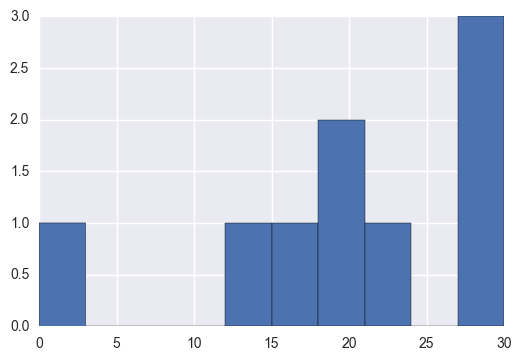

In [607]:
plt.hist(prior_days)

In [608]:
order_products_prior[1:2]

,order_id,product_id,add_to_cart_order,reordered
1,2,28985,2,1


In [611]:
order_products_prior[order_products_prior.order_id==2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [612]:
order_products_train[order_products_train.order_id == 1187899]

,order_id,product_id,add_to_cart_order,reordered
484420,1187899,196,1,1
484421,1187899,25133,2,1
484422,1187899,38928,3,1
484423,1187899,26405,4,1
484424,1187899,39657,5,1
484425,1187899,10258,6,1
484426,1187899,13032,7,1
484427,1187899,26088,8,1
484428,1187899,27845,9,0
484429,1187899,49235,10,1


In [615]:
cust1=extract_cust_data(orders,products,aisles,departments, order_products_prior, 3)

In [616]:
cust1

,user_id,order_id,order_number,product_id,aisle_id,department_id,eval_set,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,day
0,3,1374495,1,9387,24,4,prior,1,0,1,14,NaN,Granny Smith Apples,fresh fruits,produce,Sunday
1,3,1374495,1,17668,91,16,prior,2,0,1,14,NaN,Unsweetened Chocolate Almond Breeze Almond Milk,soy lactosefree,dairy eggs,Sunday
2,3,1374495,1,15143,24,4,prior,3,0,1,14,NaN,Blueberry Pint,fresh fruits,produce,Sunday
3,3,1374495,1,16797,24,4,prior,4,0,1,14,NaN,Strawberries,fresh fruits,produce,Sunday
4,3,1374495,1,39190,91,16,prior,5,0,1,14,NaN,Vanilla Unsweetened Almond Milk,soy lactosefree,dairy eggs,Sunday
5,3,1374495,1,47766,24,4,prior,6,0,1,14,NaN,Organic Avocado,fresh fruits,produce,Sunday
6,3,1374495,1,21903,123,4,prior,7,0,1,14,NaN,Organic Baby Spinach,packaged vegetables fruits,produce,Sunday
7,3,1374495,1,39922,123,4,prior,8,0,1,14,NaN,Celery Sticks,packaged vegetables fruits,produce,Sunday
8,3,1374495,1,24810,78,19,prior,9,0,1,14,NaN,Organic Lightly Salted Brown Rice Cakes,crackers,snacks,Sunday
9,3,1374495,1,32402,78,19,prior,10,0,1,14,NaN,"Crackers, Crispy, Cheddar",crackers,snacks,Sunday


In [617]:
cust1[cust1.order_id==2774568]

,user_id,order_id,order_number,product_id,aisle_id,department_id,eval_set,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,day


In [4]:
cust1=extract_cust_data(orders,products,aisles,departments, order_products_prior, 1)
display(cust1[0:5])
print(len(orders))

,user_id,order_id,order_number,product_id,aisle_id,department_id,eval_set,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department,day
0,1,2539329,1,196,77,7,prior,1,0,2,8,NaN,Soda,soft drinks,beverages,Monday
1,1,2539329,1,14084,91,16,prior,2,0,2,8,NaN,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,Monday
2,1,2539329,1,12427,23,19,prior,3,0,2,8,NaN,Original Beef Jerky,popcorn jerky,snacks,Monday
3,1,2539329,1,26088,23,19,prior,4,0,2,8,NaN,Aged White Cheddar Popcorn,popcorn jerky,snacks,Monday
4,1,2539329,1,26405,54,17,prior,5,0,2,8,NaN,XL Pick-A-Size Paper Towel Rolls,paper goods,household,Monday


3421083


In [465]:
def cust_order_prod_aisl_dept(user_id):
    cust_orders = orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_id
    num_orders = np.count_nonzero(np.unique(cust_orders))
    
    cust_prods = order_products_prior[order_products_prior.order_id.isin(list(cust_orders))].product_id
    num_prods = np.count_nonzero(np.unique(cust_prods))
    
    cust_aisles = products[products.product_id.isin(list(cust_prods))].aisle_id
    num_aisles = np.count_nonzero(np.unique(cust_aisles))
    
    cust_depts = products[products.product_id.isin(list(cust_prods))].department_id
    num_depts =  np.count_nonzero(np.unique(cust_depts))
    
    most_ord_prod = cust_prods.value_counts()[0:3].index
    numtimes_most_ord_prod = cust_prods.value_counts()[0:3].values
    
    avg_num_prod_per_order = num_prods/num_orders
    prod_in_order=[]
    for ordr in cust_orders:
        prod_in_order.append(np.shape(order_products_prior[order_products_prior.order_id == ordr].product_id)[0])
        
    std_prod_per_order = np.std(prod_in_order)
    median_prod_per_order = np.median(prod_in_order)
    last_five_num_products_order = prod_in_order[:-5]
    
    days_between_order = orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].days_since_prior_order
    days_between_order = list(days_between_order[~np.isnan(days_between_order)])
    avg_days_btw_order = np.mean(days_between_order)
    std_days_btw_order = np.std(days_between_order)
    median_days_btw_order = np.median(days_between_order)
    
    order_dow_pref = orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_dow
    order_hod_pref = orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_hour_of_day
    
    order_dow_pref_mean = np.mean(order_dow_pref)
    order_dow_pref_std = np.std(order_dow_pref)
    order_dow_pref_median = np.median(order_dow_pref)
    
    order_hod_pref_mean = np.mean(order_hod_pref)
    order_hod_pref_std = np.std(order_hod_pref)
    order_hod_pref_median = np.median(order_hod_pref)
    
    dow_pref = order_dow_pref.value_counts().index[0]
    hod_pref = order_hod_pref.value_counts().index[0]
    cust_train = extract_num_prod_train_test(orders,products,aisles,departments, order_products_prior, user_id)
    train_products_next_order = np.shape(cust_train)[0]

    most_reordered_three_padded = pad_array(list(most_ord_prod),3)
    num_times_reordered_three_padded = pad_array(list(numtimes_most_ord_prod),3)
    last_five_num_products_order_padded = pad_array(last_five_num_products_order,5)
    
    data = {'user_id': [user_id], 'num_of_orders': [num_orders], 'num_of_prods': [num_prods], 'num_of_aisles':[num_aisles],\
       'num_of_depts': [num_depts], 'most_reordered_first': [most_reordered_three_padded[0]],  'most_reordered_second': [most_reordered_three_padded[1]], \
       'most_reordered_third':[most_reordered_three_padded[2]] , 'num_times_reordered_three_first':[num_times_reordered_three_padded[0]],\
       'num_times_reordered_three_second':[num_times_reordered_three_padded[1]], 'num_times_reordered_three_third':[num_times_reordered_three_padded[2]],\
       'average_num_prods_per_order':[avg_num_prod_per_order], 'std_prod_per_order':[std_prod_per_order], \
       'median_prod_order': [median_prod_per_order], 'num_prod_last_five_order_first' : [last_five_num_products_order_padded[0]],\
        'num_prod_last_five_order_second' : [last_five_num_products_order_padded[1]],  'num_prod_last_five_order_third' : [last_five_num_products_order_padded[2]],\
        'num_prod_last_five_order_fourth' : [last_five_num_products_order_padded[3]],  'num_prod_last_five_order_fifth' : [last_five_num_products_order_padded[4]],\
       'avg_days_between_order': [avg_days_btw_order], 'std_days_between_order':[std_days_btw_order], \
       'median_days_between_order': [median_days_btw_order], 'dow_pref': [dow_pref], 'hod_pref': [hod_pref],\
       'avg_dow_pref_mean':[order_dow_pref_mean], ' avg_dow_pref_std':[order_dow_pref_std],\
       ' avg_dow_pref_median':[order_dow_pref_median], 'avg_hod_pref_mean':[order_hod_pref_mean],\
       'avg_hod_pref_std':[order_hod_pref_std], 'avg_hod_pref_median':[order_hod_pref_median], \
       'train_products_next_order': [train_products_next_order]}
    
    return data
"""
    return num_orders, num_prods, num_aisles, num_depts, most_reordered_three_padded[1], num_times_reordered_three_padded[1], \
            avg_num_prod_per_order,std_prod_per_order, median_prod_per_order, last_five_num_products_order_padded[1],\
            avg_days_btw_order, std_days_btw_order, median_days_btw_order,dow_pref,\
        order_dow_pref_mean, order_dow_pref_std, order_dow_pref_median, order_hod_pref_mean, order_hod_pref_std, \
        order_hod_pref_median, train_products_next_order   
""" 
def cust_num_orders(user_id):
    cust_orders = orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_id
    num_orders = np.count_nonzero(np.unique(cust_orders))
    return num_orders

def cust_num_products(user_id):
    cust_orders = list(orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_id)
    uni_prod = order_products_prior[order_products_prior.order_id.isin(cust_orders)].product_id
    return np.count_nonzero(np.unique(uni_prod))

def cust_num_aisles(cust):
    cust_orders = list(orders[(orders.user_id == user_id) & (orders.eval_set == 'prior') ].order_id)
    uni_prod = order_products_prior[order_products_prior.order_id.isin(cust_orders)].product_id
    uni_aisles = products[products.product_id.isin(list(uni_prod))].aisle_id
    num_aisles = np.count_nonzero(np.unique(uni_aisles))
    
    return np.count_nonzero(np.unique(cust.aisle_id))

def cust_num_department(cust):
    return np.count_nonzero(np.unique(cust.department_id))

def most_reordered_three(cust):
    return list(cust1.product_id.value_counts()[0:3].index)

def num_times_reordered_three(cust):
    return np.asarray(cust1.product_id.value_counts()[0:3].values)

def avg_num_prod_per_order(cust):
    return np.shape(cust)[0]/cust_num_orders(cust)

def std_prod_per_order(cust):
    num_prod_pr_ordr=[];
    for ord_num in np.unique(cust.order_number):
        num_prod_pr_ordr.append(np.count_nonzero(cust[cust.order_number == ord_num].product_id))
    return np.std(num_prod_pr_ordr)

def med_prod_per_order(cust):
    num_prod_pr_ordr=[];
    for ord_num in np.unique(cust.order_number):
        num_prod_pr_ordr.append(np.count_nonzero(cust[cust.order_number == ord_num].product_id))
    return np.median(num_prod_pr_ordr)

def last_five_num_products_order(cust):
    num_prod_pr_ordr=[];
    for ord_num in np.unique(cust.order_number):
        num_prod_pr_ordr.append(np.count_nonzero(cust[cust.order_number == ord_num].product_id))
    return num_prod_pr_ordr[-5:]

def avg_days_between_order(cust):
    num_days_btw_order = []
    for ord_num in np.unique(cust.order_number):
        num_days_btw_order.append(np.count_nonzero(cust[cust.order_number == ord_num].days_since_prior_order))
    return np.mean(num_days_btw_order)

def std_days_between_order(cust):
    num_days_btw_order = []
    for ord_num in np.unique(cust.order_number):
        num_days_btw_order.append(np.count_nonzero(cust[cust.order_number == ord_num].days_since_prior_order))
    return np.std(num_days_btw_order)

def med_days_between_order(cust):
    num_days_btw_order = []
    for ord_num in np.unique(cust.order_number):
        num_days_btw_order.append(np.count_nonzero(cust[cust.order_number == ord_num].days_since_prior_order))
    return np.median(num_days_btw_order)

#dow_pref(cust1)[0]
#hod_pref(cust1)[0]

def avg_prod_dow_pref(cust):
    prod_dow_pref = [];
    dow_prefd = dow_pref(cust)[0]
    cust_dow = cust[cust.order_dow == dow_prefd]
    for cust_ord in np.unique(cust_dow.order_number):
        prod_dow_pref.append(np.count_nonzero(cust_dow[cust_dow.order_number == cust_ord].product_id))
    
    return np.mean(prod_dow_pref), np.std(prod_dow_pref), np.median(prod_dow_pref)


def avg_prod_hod_pref(cust):
    prod_hod_pref = [];
    dow_prefd = hod_pref(cust)[0]
    cust_dow = cust[cust.order_hour_of_day == dow_prefd]
    for cust_ord in np.unique(cust_dow.order_number):
        prod_hod_pref.append(np.count_nonzero(cust_dow[cust_dow.order_number == cust_ord].product_id))
    
    return np.mean(prod_hod_pref), np.std(prod_hod_pref), np.median(prod_hod_pref)


In [469]:
for user_id in np.unique(orders.user_id)[1:200]:
    if user_id == 1:
        instacart_data = pd.DataFrame(cust_order_prod_aisl_dept(user_id))
    else:
        print(user_id)
        instacart_data = instacart_data.append(pd.DataFrame(data), ignore_index=True)
    


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [470]:
display(instacart_data)

,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,train_products_next_order,user_id
0,8.0,1.699673,5.900000,5.300000,5.000000,5.0,0.816497,4,7,5.0,...,6,5,6,10,10,9,2.282542,1.445683,11,1
1,14.0,5.238320,13.928571,13.928571,22.000000,21.0,2.943920,2,9,13.5,...,9,15,19,9,8,7,5.509269,5.509269,31,2
2,8.0,2.134375,7.333333,7.333333,6.250000,6.0,1.089725,0,16,7.0,...,5,5,6,10,9,8,2.013841,2.013841,-1,3
3,4.5,2.500000,3.600000,3.000000,7.000000,7.0,0.000000,4,15,2.0,...,2,2,7,2,1,1,2.366432,1.854724,-1,4
4,8.0,3.000000,9.250000,9.250000,8.500000,8.5,3.500000,3,18,10.0,...,12,9,5,4,4,3,2.680951,2.680951,9,5
5,7.0,0.000000,4.666667,4.666667,3.500000,3.5,0.500000,4,18,4.0,...,0,7,3,2,2,1,1.699673,1.699673,-1,6
6,12.0,6.298148,10.300000,10.300000,12.333333,10.0,8.730534,0,18,10.0,...,5,11,13,13,12,11,5.745433,5.745433,9,7
7,21.0,0.000000,16.333333,16.333333,17.000000,17.0,4.000000,6,0,15.0,...,0,15,13,3,3,3,3.399346,3.399346,18,8
8,35.0,0.000000,25.333333,25.333333,35.000000,35.0,0.000000,5,12,30.0,...,0,11,35,3,2,2,10.338708,10.338708,22,9
9,37.5,8.500000,28.600000,28.600000,38.000000,38.0,8.000000,5,15,30.0,...,30,46,33,4,4,4,13.275541,13.275541,4,10


In [ ]:
def pad_array(data,size_array):
   
    data = np.reshape(data,[1,-1])
    #np.shape(data)[1]
    data_out = data;
    if np.shape(data)[1] < size_array:
        pad = size_array - np.shape(data)[1];
        data_out= np.concatenate((data, np.zeros([1,pad],dtype =int)), axis = 1)
    return list(data_out.flat)


In [200]:
most_reordered_three_padded = pad_array(most_reordered_three(cust1),3)

[196, 12427, 10258]

In [334]:
usr_id = 1;
del instacart_data

cust_train = extract_num_prod_train_test(orders,products,aisles,departments, order_products_prior, 1)
train_products_next_order = np.shape(cust_train)[0]

cust1=extract_cust_data(orders,products,aisles,departments, order_products_prior, 1)

most_reordered_three_padded = pad_array(most_reordered_three(cust1),3)
num_times_reordered_three_padded = pad_array(num_times_reordered_three(cust1),3)
last_five_num_products_order_padded = pad_array(last_five_num_products_order(cust1),5)
avg_prod_dow_pref_padded = pad_array(avg_prod_dow_pref(cust1),3)
avg_prod_hod_pref_padded = pad_array(avg_prod_hod_pref(cust1),3)

data = {'user_id': [usr_id], 'num_of_orders': [cust_num_orders(cust1)], 'num_of_prods': [cust_num_products(cust1)], 'num_of_aisles':[cust_num_aisles(cust1)],\
       'num_of_depts': [cust_num_department(cust1)], 'most_reordered_first': [most_reordered_three_padded[0]],  'most_reordered_second': [most_reordered_three_padded[1]], \
       'most_reordered_third':[most_reordered_three_padded[2]], 'num_times_reordered_three_first':[num_times_reordered_three_padded[0]],\
       'num_times_reordered_three_second':[num_times_reordered_three_padded[1]], 'num_times_reordered_three_third':[num_times_reordered_three_padded[2]],\
       'average_num_prods_per_order':[avg_num_prod_per_order(cust1)], 'std_prod_per_order':[std_prod_per_order(cust1)], \
       'median_prod_order': [med_prod_per_order(cust1)], 'num_prod_last_five_order_first' : [last_five_num_products_order_padded[0]],\
        'num_prod_last_five_order_second' : [last_five_num_products_order_padded[1]],  'num_prod_last_five_order_third' : [last_five_num_products_order_padded[2]],\
        'num_prod_last_five_order_fourth' : [last_five_num_products_order_padded[3]],  'num_prod_last_five_order_fifth' : [last_five_num_products_order_padded[4]],\
       'avg_days_between_order': [avg_days_between_order(cust1)], 'std_days_between_order':[std_days_between_order(cust1)], \
       'median_days_between_order': [med_days_between_order(cust1)], 'dow_pref': [dow_pref(cust1)[0]], 'hod_pref': [hod_pref(cust1)[0]],\
       'avg_prod_dow_pref_mean':[avg_prod_dow_pref_padded[0]], ' avg_prod_dow_pref_std':[avg_prod_dow_pref_padded[1]],\
       ' avg_prod_dow_pref_median':[avg_prod_dow_pref_padded[2]], 'avg_prod_dow_pref_mean':[avg_prod_hod_pref_padded[0]],\
       'avg_prod_dow_pref_std':[avg_prod_hod_pref_padded[1]], 'avg_prod_dow_pref_median':[avg_prod_hod_pref_padded[2]], \
       'train_products_next_order': [train_products_next_order]}

instacart_data = pd.DataFrame(data)
display(instacart_data)

,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,train_products_next_order,user_id
0,8.0,1.699673,5.9,5.3,5.0,5.0,0.816497,4,7,5.0,...,6,5,6,10,10,9,2.282542,1.445683,11,1


In [335]:
for cust in np.unique(orders.user_id)[1:100]:
    cust1 = extract_cust_data(orders,products,aisles,departments, order_products_prior, cust)
    
    if np.any(orders[orders.user_id==cust].eval_set == 'train'):
        print(cust)
        cust_train = extract_num_prod_train_test(orders,products,aisles,departments, order_products_prior, cust)
        train_products_next_order = np.shape(cust_train)[0]
    else:
        train_products_next_order = -1
    
    most_reordered_three_padded = pad_array(most_reordered_three(cust1),3)
    num_times_reordered_three_padded = pad_array(num_times_reordered_three(cust1),3)
    last_five_num_products_order_padded = pad_array(last_five_num_products_order(cust1),5)
    avg_prod_dow_pref_padded = pad_array(avg_prod_dow_pref(cust1),3)
    avg_prod_hod_pref_padded = pad_array(avg_prod_hod_pref(cust1),3)

    data = {'user_id': [cust], 'num_of_orders': [cust_num_orders(cust1)], 'num_of_prods': [cust_num_products(cust1)], 'num_of_aisles':[cust_num_aisles(cust1)],\
           'num_of_depts': [cust_num_department(cust1)], 'most_reordered_first': [most_reordered_three_padded[0]],  'most_reordered_second': [most_reordered_three_padded[1]], \
           'most_reordered_third':[most_reordered_three_padded[2]], 'num_times_reordered_three_first':[num_times_reordered_three_padded[0]],\
           'num_times_reordered_three_second':[num_times_reordered_three_padded[1]], 'num_times_reordered_three_third':[num_times_reordered_three_padded[2]],\
           'average_num_prods_per_order':[avg_num_prod_per_order(cust1)], 'std_prod_per_order':[std_prod_per_order(cust1)], \
           'median_prod_order': [med_prod_per_order(cust1)], 'num_prod_last_five_order_first' : [last_five_num_products_order_padded[0]],\
            'num_prod_last_five_order_second' : [last_five_num_products_order_padded[1]],  'num_prod_last_five_order_third' : [last_five_num_products_order_padded[2]],\
            'num_prod_last_five_order_fourth' : [last_five_num_products_order_padded[3]],  'num_prod_last_five_order_fifth' : [last_five_num_products_order_padded[4]],\
           'avg_days_between_order': [avg_days_between_order(cust1)], 'std_days_between_order':[std_days_between_order(cust1)], \
           'median_days_between_order': [med_days_between_order(cust1)], 'dow_pref': [dow_pref(cust1)[0]], 'hod_pref': [hod_pref(cust1)[0]],\
           'avg_prod_dow_pref_mean':[avg_prod_dow_pref_padded[0]], ' avg_prod_dow_pref_std':[avg_prod_dow_pref_padded[1]],\
           ' avg_prod_dow_pref_median':[avg_prod_dow_pref_padded[2]], 'avg_prod_dow_pref_mean':[avg_prod_hod_pref_padded[0]],\
           'avg_prod_dow_pref_std':[avg_prod_hod_pref_padded[1]], 'avg_prod_dow_pref_median':[avg_prod_hod_pref_padded[2]], \
           'train_products_next_order': [train_products_next_order]}

    #instacart_data_add = pd.DataFrame(data)
    instacart_data = instacart_data.append(pd.DataFrame(data), ignore_index=True)
    

2
5
7
8
9
10
13
14
17
18
21
23
24
27
29
30
34
37
38
41
42
43
44
46
47
48
49
50
52
53
55
56
59
62
63
64
65
66
67
70
71
72
74
76
78
79
80
81
82
83
84
86
87
88
89
90
91
93
95
96
97
99


In [318]:
instacart_data

,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,train_products_next_order,user_id
0,8.0,1.699673,5.900000,5.300000,5.000000,5.0,0.816497,4,7,5.0,...,6,5,6,10,10,9,2.282542,1.445683,11,1
1,14.0,5.238320,13.928571,13.928571,22.000000,21.0,2.943920,2,9,13.5,...,9,15,19,9,8,7,5.509269,5.509269,31,2
2,8.0,2.134375,7.333333,7.333333,6.250000,6.0,1.089725,0,16,7.0,...,5,5,6,10,9,8,2.013841,2.013841,-1,3
3,4.5,2.500000,3.600000,3.000000,7.000000,7.0,0.000000,4,15,2.0,...,2,2,7,2,1,1,2.366432,1.854724,-1,4
4,8.0,3.000000,9.250000,9.250000,8.500000,8.5,3.500000,3,18,10.0,...,12,9,5,4,4,3,2.680951,2.680951,9,5
5,7.0,0.000000,4.666667,4.666667,3.500000,3.5,0.500000,4,18,4.0,...,0,7,3,2,2,1,1.699673,1.699673,-1,6
6,12.0,6.298148,10.300000,10.300000,12.333333,10.0,8.730534,0,18,10.0,...,5,11,13,13,12,11,5.745433,5.745433,9,7
7,21.0,0.000000,16.333333,16.333333,17.000000,17.0,4.000000,6,0,15.0,...,0,15,13,3,3,3,3.399346,3.399346,18,8
8,35.0,0.000000,25.333333,25.333333,35.000000,35.0,0.000000,5,12,30.0,...,0,11,35,3,2,2,10.338708,10.338708,22,9
9,37.5,8.500000,28.600000,28.600000,38.000000,38.0,8.000000,5,15,30.0,...,30,46,33,4,4,4,13.275541,13.275541,4,10


In [336]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)

regr = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=300, random_state=rng)

In [337]:
instacart_data_train = instacart_data[instacart_data.train_products_next_order != -1] 

In [363]:
instacart_data_train_input = instacart_data_train.drop('train_products_next_order', axis=1)
shape_input = np.shape(instacart_data_train_input)
print(shape_input[0])
instacart_data_train_input1 = instacart_data_train_input[0:(shape_input[0]-2)]
print(np.shape(instacart_data_train_input1))

63
(61, 29)


In [364]:
#instacart_data_train_input.loc

In [365]:
instacart_data_train_output = instacart_data_train.train_products_next_order[0:(shape_input[0]-2)]

In [366]:
regr.fit(instacart_data_train_input1, instacart_data_train_output)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000001B084B1EDC8>)

In [375]:
instacart_data_train

,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,train_products_next_order,user_id
0,8.0,1.699673,5.900000,5.300000,5.000000,5.0,0.816497,4,7,5.0,...,6,5,6,10,10,9,2.282542,1.445683,11,1
1,14.0,5.238320,13.928571,13.928571,22.000000,21.0,2.943920,2,9,13.5,...,9,15,19,9,8,7,5.509269,5.509269,31,2
4,8.0,3.000000,9.250000,9.250000,8.500000,8.5,3.500000,3,18,10.0,...,12,9,5,4,4,3,2.680951,2.680951,9,5
6,12.0,6.298148,10.300000,10.300000,12.333333,10.0,8.730534,0,18,10.0,...,5,11,13,13,12,11,5.745433,5.745433,9,7
7,21.0,0.000000,16.333333,16.333333,17.000000,17.0,4.000000,6,0,15.0,...,0,15,13,3,3,3,3.399346,3.399346,18,8
8,35.0,0.000000,25.333333,25.333333,35.000000,35.0,0.000000,5,12,30.0,...,0,11,35,3,2,2,10.338708,10.338708,22,9
9,37.5,8.500000,28.600000,28.600000,38.000000,38.0,8.000000,5,15,30.0,...,30,46,33,4,4,4,13.275541,13.275541,4,10
12,6.5,1.863390,6.750000,6.750000,7.000000,7.0,1.000000,6,13,6.5,...,8,5,9,12,11,9,1.920286,1.920286,5,13
13,18.5,8.314980,16.153846,16.153846,20.200000,23.0,8.376157,5,8,14.0,...,14,9,13,13,12,8,8.994410,8.994410,11,14
16,8.0,3.545621,7.350000,7.325000,8.857143,8.0,2.474358,5,12,7.0,...,13,11,7,33,30,25,2.994891,2.937261,6,17


In [377]:
y_1 = regr.predict(instacart_data_train_input.loc[63])

np.shape(instacart_data_train_input1)

C:\Users\anish_4s67ibh\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(61, 29)

In [378]:
y_1

array([ 16.])

,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_first,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,user_id
63,13.0,2.861381,13.5,13.5,17.0,17.0,1.0,6,20,15.5,...,16,11,18,17,7,7,7,5.315073,5.315073,64


,avg_prod_dow_pref_median,avg_prod_dow_pref_std,average_num_prods_per_order,avg_days_between_order,avg_prod_dow_pref_mean,avg_prod_dow_pref_median,avg_prod_dow_pref_std,dow_pref,hod_pref,median_days_between_order,...,num_prod_last_five_order_fourth,num_prod_last_five_order_second,num_prod_last_five_order_third,num_times_reordered_three_first,num_times_reordered_three_second,num_times_reordered_three_third,std_days_between_order,std_prod_per_order,train_products_next_order,user_id
63,13.0,2.861381,13.5,13.5,17.0,17.0,1.0,6,20,15.5,...,11,18,17,7,7,7,5.315073,5.315073,16,64
